In [1]:
# read in atac-seq peak data (.xls) and .bed of memory and exp-matched-ctrl genes
# output the atac seq peak data as .bed file (chr, start, end) for bed2fasta

import pandas as pd
from collections import defaultdict


In [4]:
def write_bed(atac_in, bed_in, win, op):
    
    peaks = pd.read_csv(atac_in, sep = "\t")
    #print(peaks)
    bed = pd.read_csv(bed_in, sep = "\t")
    out_df = pd.DataFrame()
    #print(bed)
    df_lst = []
    #out_df = pd.DataFrame()
    len_dst = []
    peak_dict = {}
    
    for index, row in bed.iterrows():
        
        #print(row)
        gene_start = row["start"] - win
        gene_end = row["end"] + win
        len_roi = gene_end - gene_start
        
        peaks_sub_df = peaks[peaks["chr"] == row["chrom"]]
        peaks_sub_df_1 = peaks_sub_df[peaks_sub_df["start"] >= gene_start]
        peaks_sub_df_2 = peaks_sub_df_1[peaks_sub_df_1["end"] <= gene_end]
        peaks_len = list(peaks_sub_df_2["length"])
        len_dst.append(peaks_len)
        num_peaks = len(peaks_sub_df_2) 
        norm_num_peaks = num_peaks / len_roi
        peak_dict[len_roi] = num_peaks
         
        df_lst.append(peaks_sub_df_2)

    out_df = pd.concat(df_lst)
    #print(out_df)
    final_df = out_df[["chr", "start", "end"]]
    final_df.to_csv(op, index = False, sep = "\t")
    
    return peak_dict
                        
mem_sub = write_bed("/oak/stanford/scg/lab_congle/PRT/a375_mem_atac/4_macs2/macs2_q0.05_cshl/a375_broad_20210709_cshl_peaks.txt", 
                   "/oak/stanford/scg/lab_congle/PRT/a375_mem_atac/subset_beds/202107_mem_gene_sub.bed", 10000, 
                   "/labs/congle/PRT/a375_mem_atac/subset_beds/202107_mem_peaks_cshl.bed")

ctrl_sub = write_bed("/oak/stanford/scg/lab_congle/PRT/a375_mem_atac/4_macs2/macs2_q0.05_cshl/a375_broad_20210709_cshl_peaks.txt", 
                   "/oak/stanford/scg/lab_congle/PRT/a375_mem_atac/subset_beds/202107_ctrl_gene_sub.bed", 10000, 
                   "/labs/congle/PRT/a375_mem_atac/subset_beds/202107_ctrl_peaks_cshl.bed")
        
        
    
    
    

In [28]:
from matplotlib import pyplot as plt

plt.scatter(mem_sub.keys(), mem_sub.values(), alpha = 0.5)

plt.scatter(ctrl_sub.keys(), ctrl_sub.values(), alpha = 0.5)

plt.xscale("log")


TypeError: unsupported operand type(s) for /: 'dict_values' and 'dict_keys'

In [5]:
print(mem_sub)

flat_mem = [item for sublist in mem_sub for item in sublist]
flat_ctrl = [item for sublist in ctrl_sub for item in sublist]

[[491, 1053, 1217], [158, 317, 871, 1365, 874, 200, 284, 187, 1404], [187, 1404, 914, 272, 581, 402, 670, 192, 742, 407, 409, 486, 156, 523], [442, 1563, 231, 449, 766], [205, 289, 305, 530, 672, 534, 951], [1197, 191, 460, 422, 257], [250, 1736, 609, 588, 613, 789, 651, 454], [312, 362, 210, 187, 273, 176, 602, 504, 647, 709], [], [549, 243, 906], [617, 186, 1479, 362, 464], [930, 231, 979, 478, 261, 584, 923], [1010, 915, 624], [1045, 1906], [918], [], [941, 703, 564, 403, 853, 882], [1410, 1107, 345], [1494, 581, 370], [], [1065, 759], [1265, 631, 234, 180, 551, 360], [623, 655, 376, 185], [1353, 1000], [1551, 227, 1580], [721, 671, 1087, 476, 768], [889, 889], [801, 880, 934], [1401], [1091, 509], [1091, 509, 976, 728, 1243, 302], [1016, 1677, 1480], [1212, 396, 472, 604, 174, 197, 812, 343, 930], [672, 347, 297, 1236], [894, 1262, 412, 471, 633], [1081, 534, 914, 780], [519, 301, 626, 377, 334, 730, 597, 218], [311, 957, 954], [643, 1262, 640, 354, 403, 759, 197, 437, 649, 609, 34

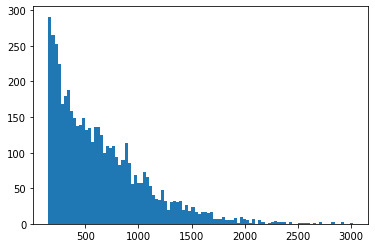

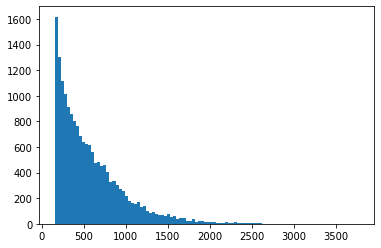

In [8]:
from matplotlib import pyplot as plt

plt.hist(flat_mem, bins = 100)
plt.show()
plt.hist(flat_ctrl, bins = 100)
plt.show()